<center><h1>Application My Credit</h1></center>


<h3>Etape 1: Lire les données (pandas)</h3>

<p><b> Descriptions détaillées des colonnes données clients bancaires :</b></p>

<p>1 - âge (numérique)

2 - emploi : type d'emploi (catégorique : "admin.", "inconnu", "chômeur", "gestion", "femme de ménage", "entrepreneur", "étudiant", "col bleu", "indépendant", "retraité", "technicien", "services")

3 - matrimonial : état civil (catégorique : "marié", "divorcé", "célibataire" ; attention : "divorcé" signifie divorcé ou veuf)

4 - éducation (catégorique : "inconnu", "secondaire", "primaire", "tertiaire")

5 - défaut : le crédit est-il en défaut ? (binaire : "oui", "non")

6 - solde : solde annuel moyen, en euros (numérique) 

7 - logement : a-t-il un prêt logement ? (binaire : "oui", "non")

8 - prêt : avez-vous un prêt personnel ? (binaire : "oui", "non")

>> lié au dernier contact de la campagne en cours :

9 - contact : type de communication du contact (catégorique : "inconnu", "téléphone", "cellulaire")

10 - jour : dernier jour de contact du mois (numérique)

11 - mois : dernier mois de contact de l'année (catégorique : "jan" , "feb", "mar", …, "nov", "dec")

12 - durée : durée du dernier contact, en secondes (numérique)

>> autres attributs :

13 - campagne : nombre de contacts effectués pendant cette campagne et pour cette client (numérique, inclut le dernier contact)

14 - pdays : nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique, -1 signifie que le client n'a pas été contacté auparavant)

15 - précédent :nombre de contacts effectués avant cette campagne et pour ce client (numérique)

16 - poutcome : résultat de la campagne marketing précédente (catégorique : "inconnu", "autre", "échec", "succès")

>> Variable de sortie (cible souhaitée) :

17 - y - le client a-t-il obtenu un crédit ? (binaire : "oui", "non")</p>

In [3]:
#Importation des bibliothèques nécéssaires
import pandas as pd
import numpy as np

In [4]:
#Importation des données dans une variable
pd.options.display.float_format = '{:.2f}'.format #Enlève l'écriture scientifique
data_bancaire = pd.read_csv(r'C:\Users\utilisateur\Desktop\enviro\Brief_App_Cloud\My-Credit-HGJ\Analyse des données\train.csv', delimiter=';')

<h3>Etape 2: Exploration des données préalables --EXPLORATORY DATA ANALYSIS (EDA) (OBLIGATOIRE)</h3>

**1 - Est ce qu'il y a des valeurs manquantes.**
Colonnes avec valeurs manquantes

Colonnes avec valeurs manquantes(TEST SET)

**2 - Quelles sont les colonnes catégoriques**

Etape particulière pour les gérer

**3 - Parmis les colonnes on a du text, sont-elle utilisables?**

**4- Est ce qu'il y a des colonnes qu'on veut supprimer**(ou laisser passer telle quelle).

In [5]:
#On affiche les 25 premières ligne
data_bancaire.head(25)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


<p>Observation:<br>On constacte qu'il y a visiblement des manquantes dans la colonne "contact" et "éducation". Se pose alors la question de savoir si la colonne "contact" est utilse pour répondre à la question si la personne va pouvoir contracté un crédit ou non.</p>

In [6]:
#On affiche les 25 dernières lignes
data_bancaire.tail(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45186,59,unknown,married,unknown,no,1500,no,no,cellular,16,nov,280,1,104,2,failure,no
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes


In [7]:
#Vérifier si il y a des valeurs manquantes
data_bancaire.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<p>Il y a pas de valeurs manquantes</p>

In [8]:
#Affiche la forme de nos données
data_bancaire.shape

(45211, 17)

<p>La forme de nos données est un tableau contenant 45211 lignes et 17 colonnes</p>

In [9]:
#Affiche les informations utiles de nos données
data_bancaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
#Affiche les types de nos données
data_bancaire.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<p>Les données est composé de deux type( int et object)</p>

In [11]:
data_bancaire.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [12]:
#Corrélation de nos donnée
data_bancaire.corr()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_13132\729297999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_bancaire.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


<h2>Visualisation des données</h2>

In [13]:
#Importation des librairie nécéssaires
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

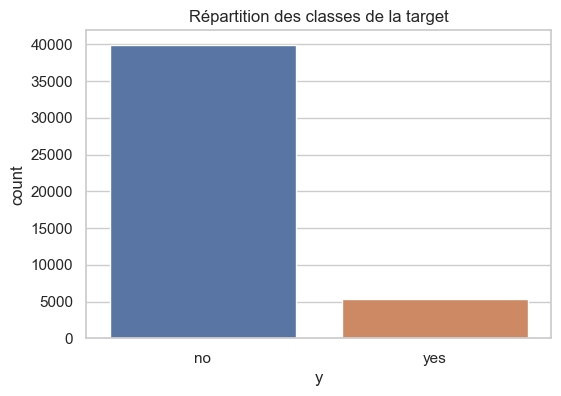

In [14]:
#Visualisation de la répartition des classe de la variable cible avec un graphique countplot
sns.set(style= "whitegrid")
plt.figure(figsize= (6,4))
sns.countplot(x= "y", data=data_bancaire)

plt.title("Répartition des classes de la target")
plt.show()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_13132\1813510575.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_bancaire.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

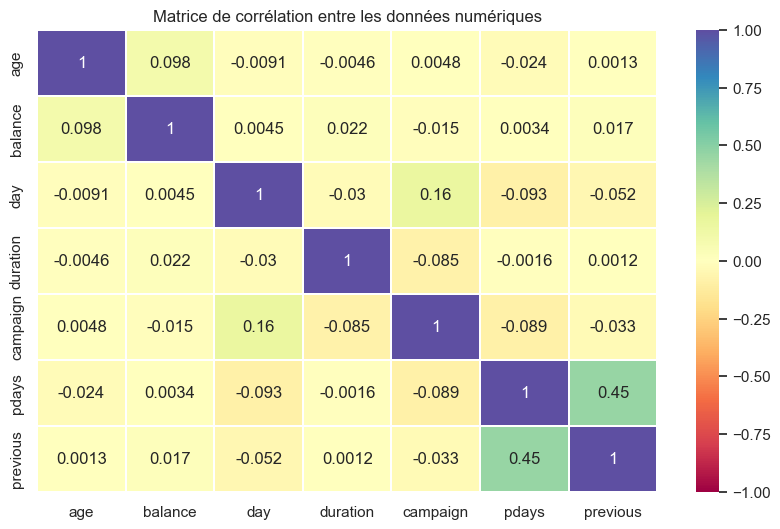

In [15]:
#Visualisation des données en fonction d'autres caractéristiques
#Création d'une heatmap pour afficher les corrélations
plt.figure(figsize=(10, 6))
correlation_matrix = data_bancaire.corr()
sns.heatmap(correlation_matrix, annot= True, cmap= 'Spectral', linewidths = 0.25,
              vmin = -1,
              vmax = +1)
plt.title("Matrice de corrélation entre les données numériques")
plt.show

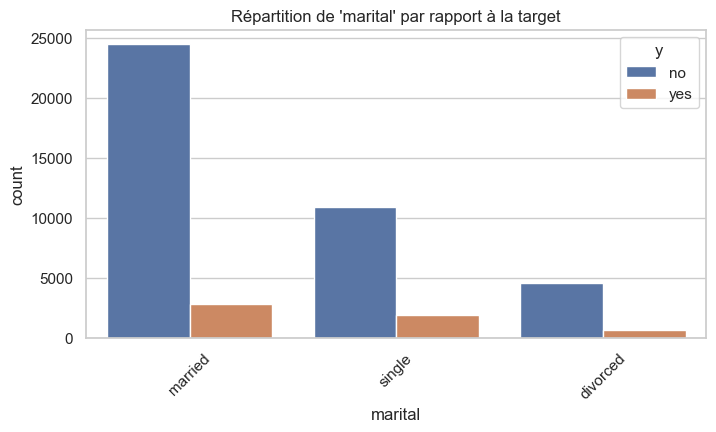

In [16]:
#Visulisation avec un barplot pour explorer la distribution de la variables caté "marital" par rapport à "y"
plt.figure(figsize=(8, 4))
sns.countplot(x= "marital", hue= "y", data= data_bancaire)

plt.title("Répartition de 'marital' par rapport à la target" )
plt.xticks(rotation = 45)
plt.show()



_________________________________________________
test

In [17]:
data_bancaire.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
target = ['y']  #Variable cible
drop_cols = ['contact'] #Colonne que l'on jettes
passthrough_cols = ['age', 'duration', 'campaign', 'day', 'pdays', 'balance'] #Colonne que l'on touche pas

#Faire du Preprocessing(Feature Engineering, Data Cleaning)
#Colonnes texte avec ou sans valeurs manquantes
text_cols_with_missing_values = ['job']
text_cols_without_missing_values = ['month']

#Colonne numerique avec valeurs manquantes
numeric_cols_with_missing_values = ['previous']

#Colonne catégorique avec ou sans valeurs manquante
categorical_cols_with_missing_values = ['education', 'poutcome']
categorical_cols_without_missing_values = ['housing', 'loan', 'marital', 'default']

In [19]:
list_of_lists = [target,
                  drop_cols,
                  passthrough_cols,
                  text_cols_with_missing_values,
                  text_cols_without_missing_values,
                  numeric_cols_with_missing_values,
                  categorical_cols_with_missing_values,
                  categorical_cols_without_missing_values]

In [20]:
#Verification des doublons et mal écrit
#Verification si on a mis le nom de la liste deux fois

set_cols_our_columns = set() #Au départ vide

for liste in list_of_lists:
    #Vérification de doublon
    for col in liste:
        if col in set_cols_our_columns: #Si déja mis j'affiche un warning
            print(f"Attention; {col} déjà mise...")
        set_cols_our_columns.add(col) #Dans tous les cas, j'ajoute


#Si on a pas oublié une colonne.
#Si on a pas fait une faute dans les noms de colonne.
set_original_column = set(data_bancaire.columns)

poorly_written = set_cols_our_columns - set_original_column
missing_cols = set_original_column - set_cols_our_columns 

print(f"Colonnes manquantes : {missing_cols}")
print(f"Colonnes mal écrites: {poorly_written}")

set_cols_our_columns

Colonnes manquantes : set()
Colonnes mal écrites: set()


{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'y'}

In [21]:
#Séparation des Features de la Target
X = data_bancaire.drop('y', axis = 'columns')
y = data_bancaire['y']

In [22]:
X.shape, y.shape

((45211, 16), (45211,))

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


<h3>Preprocessing</h3>

In [25]:
#Importation des outils pour faire le préprocessing en tant que tel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer

In [26]:
#Importer les utilitaires Sklearn pour faire plus proprement
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [27]:
cat_missing_prepro = make_pipeline(SimpleImputer(strategy='constant', fill_value= 0),
                                   OneHotEncoder(handle_unknown= 'ignore'))

In [28]:
preprocessing = make_column_transformer(
    (OneHotEncoder(handle_unknown= 'ignore'), categorical_cols_without_missing_values),
    (cat_missing_prepro, categorical_cols_with_missing_values),
    (SimpleImputer(strategy='constant', fill_value= 0), numeric_cols_with_missing_values),
    ('drop', text_cols_without_missing_values),
    ('passthrough', passthrough_cols),
    ('drop', drop_cols)
)


preprocessing

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['housing', 'loan', 'marital', 'default']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['education', 'poutcome']),
                                ('simpleimputer',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['previous']),
                                ('drop-1', 'drop', ['month']),
                                ('passthrough', 'passthrough',
                                 ['age', 'duration', 'campaign', 'day', 'pdays',
                                  'balance']),
                                ('drop-2', 'drop', ['contact'])])

In [29]:
preprocessing.fit_transform(X)

array([[ 0.000e+00,  1.000e+00,  1.000e+00, ...,  5.000e+00, -1.000e+00,
         2.143e+03],
       [ 0.000e+00,  1.000e+00,  1.000e+00, ...,  5.000e+00, -1.000e+00,
         2.900e+01],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ...,  5.000e+00, -1.000e+00,
         2.000e+00],
       ...,
       [ 1.000e+00,  0.000e+00,  1.000e+00, ...,  1.700e+01,  1.840e+02,
         5.715e+03],
       [ 1.000e+00,  0.000e+00,  1.000e+00, ...,  1.700e+01, -1.000e+00,
         6.680e+02],
       [ 1.000e+00,  0.000e+00,  1.000e+00, ...,  1.700e+01,  1.880e+02,
         2.971e+03]])

<h3>Définir Une Pipeline Sklearn et Tous ses Hyperparamètres</h3>

<p>Une pipeline ce fait en deux phases:

<p>Rappel Pipeline: C'est une liste d'étape.</p>
<ul>
<li>Training: On défini les étapes du préprocessing, l'algo que l'on va utiliser.Et pour ces deux étapes, on spécifie les hyperparamètre afin d'obtenir au final le résultat de la phase de training(Etapes de prépro ajuster et un modèle entrainé).</li>
<li>Prédiction: Ces étapes de prépro ajuster et un modèle entrainé seront integrer dans la phase prédict.</li></ul></p>
<p>A noté que pour ces deux étape on va définir les hyperparametre.</p>

In [30]:
#Importation de ce qui va permettre de créer une Pipeline
from sklearn.pipeline import Pipeline
#Importation des Algos que l'on va utilisées qui vont être integrer dans la Pipeline.
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN


In [31]:
#Création de la pipeline KNN
knn_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('knn', KNN())
])

In [32]:
#Création de la pipeline RidgeClassifer
ridge_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('ridge', RidgeClassifier())
])

In [33]:
#Création d'une nouvelle pipeline avec le Random Forest
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForest(random_state= 777))
])

<h3>FOLD CROSS VALIDATION</h3>
<p>Manière d'évaluer (avoir un CROSS_VAL_SCORE) un modèle ou une pipeline. Avoir une estimation plus robuste du modèle.</p>
<p>K c'est l'emplacement du nombre que l'on veut. FOLD veut dire plis ou bouts.</br>En gros, imaginons que l'on défini un K = 5. On va avoir des données pliés en 5 plie différents. Donc on crée 5 petit dataset différents. On va donc pouvoir faire un split train test qui sera différent sur chaque bout</br>

Notre objectif dans le workflow c'est de créer un clone de la pipeline pour chacun des splits. Afin d'avoir K clones non entrainer. Après on va entrainer chacun de ces clones sur le train set des K bout pour l'entrainement en retirant celui du test biensur. Donc entrainer et évaluer sur K manière différent</p>

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
#Exemple
cross_val_folds = KFold(n_splits= 5, shuffle= True, random_state= 777)

<h3>Choix de la Pipeline</h3>

<h3>KNN</h3>

In [36]:
cv_score= cross_val_score(knn_pipe, X, y, cv= cross_val_folds)

print(cv_score)
cv_score.mean(), cv_score.std


[0.88410926 0.88099978 0.88133156 0.88619774 0.88077859]


(0.8826833862142053, <function ndarray.std>)

<h3>RidgeClassifier</h3>

In [37]:
cv_score = cross_val_score(ridge_pipe, X, y, cv= cross_val_folds)

print(cv_score)
cv_score.mean(), cv_score.std

[0.89715802 0.89272285 0.89471356 0.90179164 0.90068569]


(0.8974143517358376, <function ndarray.std>)

<h3>RandomForest</h3>

In [38]:
cv_score = cross_val_score(rf_pipeline, X, y, cv= cross_val_folds)

print(cv_score)
cv_score.mean(), cv_score.std

[0.89881676 0.89615129 0.8959301  0.9025658  0.89913736]


(0.8985202650571921, <function ndarray.std>)

<h2>Grid Search</h2>

<ul><h4>Mission</h4>
<li>Créez un shema de crossvalidation</li>
<li>Testez une grande variété de Pipeline( differents algos, preprocessing, hyperparametres</li>
<li>Sélectionner la Pipeline avec le meilleur score de Cross Validation</li>
<li>Ré-entrainez la Pipeline sur la totalité des données disponibles pour l'entrainement</li>
</ul>

<p>Grid Search CV permet de définir une Pipeline, de tester différents hyperparametres( n_neighbors, weights). Les différents rélgages vont nous donner différents résultats. La question est de savoir comment trouver les meilleurs hyperparametres. On va donc tester plusieurs combinaisons en créant par ex une pipeline avec un n_neighbors = 1 un autre pipeline avec un n_neighbors = 5 et ainsi de suite. Donc pour tester tout ca on va creer ce que l'on appel une Grid d'hyperparametre</p>

In [39]:
#Importation de ce qui va permettre de créer une Pipeline
from sklearn.pipeline import Pipeline
#Importation des Algos que l'on va utilisées qui vont être integrer dans la Pipeline.
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.model_selection import GridSearchCV

In [40]:
knn_pipe = Pipeline([
    ('preproc', preprocessing),
    ('knn', KNN())
])

In [41]:
knn = {}

#Pipeline knn
knn['pipeline'] = Pipeline([
    ('preproc', preprocessing),
    ('knn', KNN())
])


#Grille pour la pipeline KNN
#Création d'une grille d'hyperparametre
knn['hyperparametres'] = {}
knn['hyperparametres']['knn__n_neighbors'] = [1, 3, 5, 7, 13, 17, 21, 27, 29]
knn['hyperparametres']['knn__weights'] = ['uniform', 'distance']

#Création de la gridsearch pour la pipeline
knn['gridsearch'] = GridSearchCV(estimator= knn['pipeline'],
                                 param_grid= knn['hyperparametres'],
                                 scoring= 'accuracy',
                                 cv = cross_val_folds)

In [42]:
knn['gridsearch'].fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'marital',
                                                                          'default']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEnco...
                                                                         SimpleImputer(fill_value=0,
                                                                                       strategy='constant'),
                                                                         ['previous']),
                                                                        ('drop-1',
                                                                         'drop',
                                                                         ['month']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'day',
                                                                          'pdays',
                                                                          'balance']),
                                                                        ('drop-2',
                                                                         'drop',
                                                                         ['contact'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 13, 17, 21, 27, 29],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [43]:
knn['gridsearch'].best_params_

{'knn__n_neighbors': 29, 'knn__weights': 'distance'}

In [44]:
knn['gridsearch'].best_score_

0.8874831016390685

<p><b>Teste avec le RidgeClassifier</b></p>

In [45]:
ridge = {}

#Pipeline pour le ridge classifier
ridge['pipeline'] = Pipeline([
    ('preproc', preprocessing), ('ridge', RidgeClassifier())
])

#Grille pour la pipeline ridge
ridge['hyperparamètres'] = {}
ridge['hyperparamètres']['ridge__alpha'] = [9, 9.2, 9.5, 10, 10.2, 10.5, 10.6]

#Création du Gridsearch pour la pipeline ridge

ridge['gridsearch'] = GridSearchCV(estimator= ridge['pipeline'],
                                   param_grid= ridge['hyperparamètres'],
                                   scoring= 'balanced_accuracy',
                                   cv = cross_val_folds)


In [46]:
ridge['gridsearch'].fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'marital',
                                                                          'default']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEnco...
                                                                          'poutcome']),
                                                                        ('simpleimputer',
                                                                         SimpleImputer(fill_value=0,
                                                                                       strategy='constant'),
                                                                         ['previous']),
                                                                        ('drop-1',
                                                                         'drop',
                                                                         ['month']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'day',
                                                                          'pdays',
                                                                          'balance']),
                                                                        ('drop-2',
                                                                         'drop',
                                                                         ['contact'])])),
                                       ('ridge', RidgeClassifier())]),
             param_grid={'ridge__alpha': [9, 9.2, 9.5, 10, 10.2, 10.5, 10.6]},
             scoring='balanced_accuracy')

In [47]:
ridge['gridsearch'].best_params_

{'ridge__alpha': 9}

In [48]:
ridge['gridsearch'].best_score_

0.6255283437000474

<p><b>Teste avec le RandomForest</b></p>

In [49]:
rf = {}

#Pipeline pour la rf classifier
rf['pipeline'] = Pipeline([
    ('preproc', preprocessing), ('rf', RandomForest())
])

#Grille pour la pipeline rf
rf['hyperparamètres'] = {}
rf['hyperparamètres']['rf__n_estimators'] = [33, 100]
rf['hyperparamètres']['rf__max_features'] = ['sqrt', None, 0.1, 0.60]
rf['hyperparamètres']['rf__max_depth'] = [None, 2, 8]
rf['hyperparamètres']['rf__min_samples_split'] = [2, 8]

#Création du Gridsearch pour la pipeline rf

rf['gridsearch'] = GridSearchCV(estimator = rf['pipeline'],
                                   param_grid = rf['hyperparamètres'],
                                   scoring = 'balanced_accuracy',
                                   cv = cross_val_folds)

In [50]:
rf['gridsearch']

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'marital',
                                                                          'default']),
                                                                        ('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEnco...
                                                                         ['previous']),
                                                                        ('drop-1',
                                                                         'drop',
                                                                         ['month']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'day',
                                                                          'pdays',
                                                                          'balance']),
                                                                        ('drop-2',
                                                                         'drop',
                                                                         ['contact'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 2, 8],
                         'rf__max_features': ['sqrt', None, 0.1, 0.6],
                         'rf__min_samples_split': [2, 8],
                         'rf__n_estimators': [33, 100]},
             scoring='balanced_accuracy')

In [51]:
rf['gridsearch'].fit(X, y)

: 

In [ ]:
rf['gridsearch'].best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
rf['gridsearch'].best_socre_

<h3>Comparaisons des scores</h3>

In [ ]:
rf['gridsearch'].best_score_, ridge['gridsearch'].best_score_, knn['gridsearch'].best_score_

</p>Notre meilleur choix selon le resultat c'est de prendre le ridge<p>

<p><b>On va ré entrainer avec la pipeline final qui a été choisi</b></p>